<a href="https://colab.research.google.com/github/mannixp/CHIST/blob/main/PDF_Construction_using_extruded_mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update --fix-missing

try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

**Example 1 - Analytical functions**

**1D function**

As an example we construct the PDF and CDF of the function $Y(x_1) = x_1^{3/2}$ on the interval $x_1 \in [0,1]$. To do so we first import

In [1]:
from numdf import Ptp

where Ptp which stands for physical to probability is the object we will use. To instantiate this object we can call

In [2]:
ptp = Ptp(Omega_X={'x1': (0, 1)}, Omega_Y={'Y': (0, 1)}, n_elements=100)

specifying the phyiscal domain $\Omega_X$, the domain of the CDF and PDF $\Omega_Y$ (i.e. the range of $Y(\mathbf{x})$) and the number of elements we will use. We can then grab the coordinate function(s) $x_1$ and write our function $Y(x_1)$ in terms of these coordinate(s).

In [3]:
x1 = ptp.x_coords()
Y = x1**(3/2)

To obtain the density object corresponding to this function, which contains the CDF, QDF and PDF, we call the fit method

In [4]:
density = ptp.fit(Y=Y, quadrature_degree=1000)

Once fitted we can then plot these functions by calling the plot method

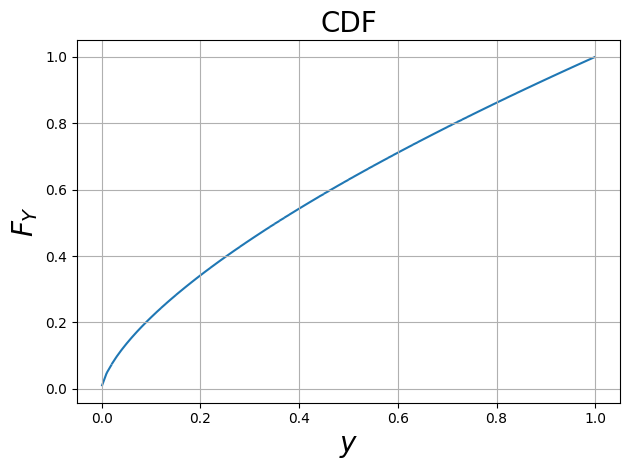

In [5]:
density.plot()

or evaluate them on a user specified grid $y_i$ by calling the evaluate method as follows

In [6]:
import numpy as np
y_i = np.linspace(0,1,100)

F_Y,Q_Y,f_Y  = density.evaluate(y = y_i)

**2D function**

In two dimensions the method works exactly the same way. We initialise a new instance of ptp

In [7]:
ptp = Ptp(Omega_X={'x1': (0, 1), 'x2': (0, 1)}, Omega_Y={'Y': (0, 2)}, n_elements=100)

grab the coordinate functions and specify our function

In [8]:
x1, x2 = ptp.x_coords()
Y = x1 + x2

and then call then call the fit method on our function to return a density object

In [9]:
density = ptp.fit(Y=Y, quadrature_degree=200)

whose CDF we plot below.

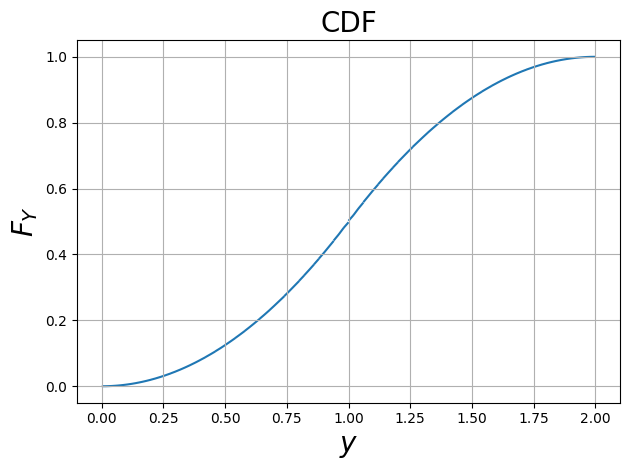

In [10]:
density.plot()